In [1]:
import pandas as pd
from pyspark import SparkContext, SparkConf
from pyspark.mllib.fpm import FPGrowth


In [2]:
try:
    sc = SparkContext("local", 'Market Basket Analysis').getOrCreate()
#scSparkSession.builder.master("local[*]").getOrCreate()
except:
    sc = SparkContext.getOrCreate()
    print (sc.getConf().toDebugString())


In [3]:
data = sc.textFile("file:///Users/shved/Downloads/dataset_market_analysis/groceries.csv")
data.cache()
data.count()

9835

In [4]:
numPart = data.getNumPartitions()
print("Number of partition: ", numPart)
data.take(10)


Number of partition:  1


['citrus fruit,semi-finished bread,margarine,ready soups',
 'tropical fruit,yogurt,coffee',
 'whole milk',
 'pip fruit,yogurt,cream cheese ,meat spreads',
 'other vegetables,whole milk,condensed milk,long life bakery product',
 'whole milk,butter,yogurt,rice,abrasive cleaner',
 'rolls/buns',
 'other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer)',
 'pot plants',
 'whole milk,cereals']

In [5]:
print ("\nItems statistic")
item_stat = sorted(data.flatMap(lambda line: line.split(",")) \
                .map(lambda label : (label,1)) \
                .countByKey() \
                .items())

for line in item_stat:
    print (line)


Items statistic
('Instant food products', 79)
('UHT-milk', 329)
('abrasive cleaner', 35)
('artif. sweetener', 32)
('baby cosmetics', 6)
('baby food', 1)
('bags', 4)
('baking powder', 174)
('bathroom cleaner', 27)
('beef', 516)
('berries', 327)
('beverages', 256)
('bottled beer', 792)
('bottled water', 1087)
('brandy', 41)
('brown bread', 638)
('butter', 545)
('butter milk', 275)
('cake bar', 130)
('candles', 88)
('candy', 294)
('canned beer', 764)
('canned fish', 148)
('canned fruit', 32)
('canned vegetables', 106)
('cat food', 229)
('cereals', 56)
('chewing gum', 207)
('chicken', 422)
('chocolate', 488)
('chocolate marshmallow', 89)
('citrus fruit', 814)
('cleaner', 50)
('cling film/bags', 112)
('cocoa drinks', 22)
('coffee', 571)
('condensed milk', 101)
('cooking chocolate', 25)
('cookware', 27)
('cream', 13)
('cream cheese ', 390)
('curd', 524)
('curd cheese', 50)
('decalcifier', 15)
('dental care', 57)
('dessert', 365)
('detergent', 189)
('dish cleaner', 103)
('dishes', 173)
('dog

In [6]:
data2 = data.map(lambda x : list(x.split(',')))
print("Count of lists: ", data2.count())
for line in data2.top(30):
    print(line)

Count of lists:  9835
['zwieback', 'salty snack', 'popcorn', 'waffles', 'chocolate']
['zwieback', 'oil', 'mustard', 'chocolate']
['zwieback', 'long life bakery product', 'dental care']
['zwieback', 'long life bakery product']
['zwieback', 'dishes']
['zwieback', 'cat food', 'dish cleaner']
['zwieback', 'bottled beer', 'hygiene articles']
['zwieback']
['zwieback']
['zwieback']
['zwieback']
['zwieback']
['zwieback']
['yogurt', 'zwieback', 'soda', 'chocolate marshmallow', 'shopping bags']
['yogurt', 'white wine', 'red/blush wine']
['yogurt', 'white wine']
['yogurt', 'white wine']
['yogurt', 'whipped/sour cream', 'hard cheese', 'ketchup']
['yogurt', 'whipped/sour cream', 'frozen vegetables', 'salt', 'pasta', 'baking powder', 'soda', 'misc. beverages', 'fruit/vegetable juice']
['yogurt', 'whipped/sour cream', 'flour', 'margarine', 'sugar', 'baking powder', 'cat food', 'soda', 'fruit/vegetable juice', 'chocolate', 'hygiene articles', 'napkins', 'newspapers']
['yogurt', 'whipped/sour cream', '

In [7]:
model = FPGrowth.train(data2, minSupport=0.02, numPartitions=numPart)

print (model)

In [8]:
# result from model
item_sets = model.freqItemsets().collect()
for item_set in item_sets:
    print (item_set)

FreqItemset(items=['pork'], freq=567)
FreqItemset(items=['pork', 'other vegetables'], freq=213)
FreqItemset(items=['pork', 'whole milk'], freq=218)
FreqItemset(items=['hygiene articles'], freq=324)
FreqItemset(items=['cream cheese '], freq=390)
FreqItemset(items=['ham'], freq=256)
FreqItemset(items=['ice cream'], freq=246)
FreqItemset(items=['whipped/sour cream'], freq=705)
FreqItemset(items=['whipped/sour cream', 'yogurt'], freq=204)
FreqItemset(items=['whipped/sour cream', 'other vegetables'], freq=284)
FreqItemset(items=['whipped/sour cream', 'whole milk'], freq=317)
FreqItemset(items=['shopping bags'], freq=969)
FreqItemset(items=['shopping bags', 'other vegetables'], freq=228)
FreqItemset(items=['shopping bags', 'soda'], freq=242)
FreqItemset(items=['shopping bags', 'whole milk'], freq=241)
FreqItemset(items=['candy'], freq=294)
FreqItemset(items=['long life bakery product'], freq=368)
FreqItemset(items=['beef'], freq=516)
FreqItemset(items=['beef', 'whole milk'], freq=209)
FreqIt

In [9]:
#find support
count_transactions = float(data.count())

item_sets_with_support = {}
for item_set in item_sets:
    item_sets_with_support[frozenset(item_set.items)] = item_set.freq/count_transactions
    
for support in item_sets_with_support.items():
    print (support)

(frozenset({'pork'}), 0.05765124555160142)
(frozenset({'pork', 'other vegetables'}), 0.021657346212506354)
(frozenset({'pork', 'whole milk'}), 0.022165734621250637)
(frozenset({'hygiene articles'}), 0.03294356888662939)
(frozenset({'cream cheese '}), 0.03965429588205389)
(frozenset({'ham'}), 0.026029486527707167)
(frozenset({'ice cream'}), 0.025012709710218607)
(frozenset({'whipped/sour cream'}), 0.07168276563294357)
(frozenset({'yogurt', 'whipped/sour cream'}), 0.02074224707676665)
(frozenset({'whipped/sour cream', 'other vegetables'}), 0.02887646161667514)
(frozenset({'whipped/sour cream', 'whole milk'}), 0.032231825114387394)
(frozenset({'shopping bags'}), 0.09852567361464158)
(frozenset({'shopping bags', 'other vegetables'}), 0.023182511438739197)
(frozenset({'shopping bags', 'soda'}), 0.024605998983223184)
(frozenset({'shopping bags', 'whole milk'}), 0.024504321301474327)
(frozenset({'candy'}), 0.0298932384341637)
(frozenset({'long life bakery product'}), 0.037417386883579054)
(fr

In [10]:
# rules and cal confident and lift

print(item_sets_with_support)
rules = []
for (item_set,item_set_supp) in item_sets_with_support.items():
    if(len(item_set)>1):
        for (LHS,LHS_supp) in item_sets_with_support.items():
            if(LHS < item_set):
                RHS = item_set - LHS
                RHS_supp = item_sets_with_support[RHS]
                confidence = item_set_supp/LHS_supp
                lift = item_set_supp/(LHS_supp*RHS_supp)
                rules.append([LHS,RHS,item_set_supp,confidence,lift])

rules = sorted(rules, key=lambda x: x[3], reverse=True)
print(rules)

{frozenset({'pork'}): 0.05765124555160142, frozenset({'pork', 'other vegetables'}): 0.021657346212506354, frozenset({'pork', 'whole milk'}): 0.022165734621250637, frozenset({'hygiene articles'}): 0.03294356888662939, frozenset({'cream cheese '}): 0.03965429588205389, frozenset({'ham'}): 0.026029486527707167, frozenset({'ice cream'}): 0.025012709710218607, frozenset({'whipped/sour cream'}): 0.07168276563294357, frozenset({'yogurt', 'whipped/sour cream'}): 0.02074224707676665, frozenset({'whipped/sour cream', 'other vegetables'}): 0.02887646161667514, frozenset({'whipped/sour cream', 'whole milk'}): 0.032231825114387394, frozenset({'shopping bags'}): 0.09852567361464158, frozenset({'shopping bags', 'other vegetables'}): 0.023182511438739197, frozenset({'shopping bags', 'soda'}): 0.024605998983223184, frozenset({'shopping bags', 'whole milk'}): 0.024504321301474327, frozenset({'candy'}): 0.0298932384341637, frozenset({'long life bakery product'}): 0.037417386883579054, frozenset({'beef'})

In [11]:
#convert list to DF 
tuple_rules = [tuple([list(rule[0]),list(rule[1]),rule[2],rule[3],rule[4]]) for rule in rules]
rule_rdd = sc.parallelize(tuple_rules)
rule_rdd.top(3)

[(['yogurt', 'whole milk'],
  ['other vegetables'],
  0.02226741230299949,
  0.39745916515426494,
  2.0541307878571704),
 (['yogurt', 'other vegetables'],
  ['whole milk'],
  0.02226741230299949,
  0.5128805620608898,
  2.0072345116867694),
 (['yogurt'],
  ['whole milk'],
  0.05602440264361973,
  0.40160349854227406,
  1.5717351405345263)]

In [12]:
from pyspark.sql import SparkSession
spark = (SparkSession
         .builder
         .appName("Market Basket Analysis")
         .getOrCreate())



In [13]:
#toDF method is a monkey patch executed inside SparkSession (SQLContext constructor in 1.x) constructor 
#so to be able to use it you have to create a SQLContext (or SparkSession)

#rule_df = rule_rdd.map(lambda x: Row(**f(x))).toDF(["LHS","RHS","sup","conf","lift"])
rule_df = rule_rdd.toDF(["antecedent(LHS)","consequent(RHS)","support","confidence","lift"])
print("The RHS is the Consequent or the item we propose the customer will buy. The LHS is the Antecedent or the item which customer already bought.")
rule_df.sort("confidence",ascending=False).toPandas()

The RHS is the Consequent or the item we propose the customer will buy. The LHS is the Antecedent or the item which customer already bought.


,antecedent(LHS),consequent(RHS),support,confidence,lift
0,"[yogurt, other vegetables]",[whole milk],0.022267,0.512881,2.007235
1,[butter],[whole milk],0.027555,0.497248,1.946053
2,[curd],[whole milk],0.026131,0.490458,1.919481
3,"[other vegetables, root vegetables]",[whole milk],0.023183,0.489270,1.914833
4,"[whole milk, root vegetables]",[other vegetables],0.023183,0.474012,2.449770
5,[domestic eggs],[whole milk],0.029995,0.472756,1.850203
6,[whipped/sour cream],[whole milk],0.032232,0.449645,1.759754
7,[root vegetables],[whole milk],0.048907,0.448694,1.756031
8,[root vegetables],[other vegetables],0.047382,0.434701,2.246605
9,[frozen vegetables],[whole milk],0.020437,0.424947,1.663094


In [14]:
#sort by desc(conf)
rule_df.sort("confidence",ascending=False).filter(rule_df["confidence"] > 0.4).toPandas()

,antecedent(LHS),consequent(RHS),support,confidence,lift
0,"[yogurt, other vegetables]",[whole milk],0.022267,0.512881,2.007235
1,[butter],[whole milk],0.027555,0.497248,1.946053
2,[curd],[whole milk],0.026131,0.490458,1.919481
3,"[other vegetables, root vegetables]",[whole milk],0.023183,0.489270,1.914833
4,"[whole milk, root vegetables]",[other vegetables],0.023183,0.474012,2.449770
5,[domestic eggs],[whole milk],0.029995,0.472756,1.850203
6,[whipped/sour cream],[whole milk],0.032232,0.449645,1.759754
7,[root vegetables],[whole milk],0.048907,0.448694,1.756031
8,[root vegetables],[other vegetables],0.047382,0.434701,2.246605
9,[frozen vegetables],[whole milk],0.020437,0.424947,1.663094


In [15]:
#desc(lift)
rule_df.sort("lift",ascending=False).filter(rule_df["confidence"] > 0.4).toPandas()

,antecedent(LHS),consequent(RHS),support,confidence,lift
0,"[whole milk, root vegetables]",[other vegetables],0.023183,0.474012,2.449770
1,[root vegetables],[other vegetables],0.047382,0.434701,2.246605
2,[whipped/sour cream],[other vegetables],0.028876,0.402837,2.081924
3,"[yogurt, other vegetables]",[whole milk],0.022267,0.512881,2.007235
4,[butter],[whole milk],0.027555,0.497248,1.946053
5,[curd],[whole milk],0.026131,0.490458,1.919481
6,"[other vegetables, root vegetables]",[whole milk],0.023183,0.489270,1.914833
7,[domestic eggs],[whole milk],0.029995,0.472756,1.850203
8,[whipped/sour cream],[whole milk],0.032232,0.449645,1.759754
9,[root vegetables],[whole milk],0.048907,0.448694,1.756031


In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


Text(0,0.5,'confidence')

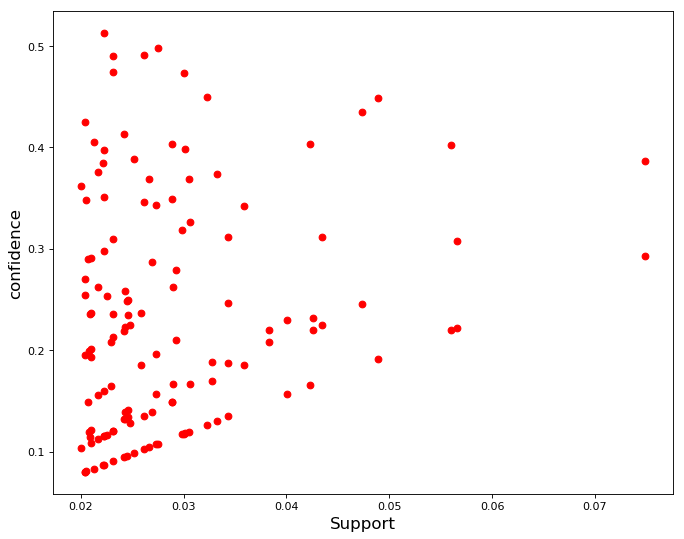

In [17]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(rule_df.toPandas()['support'], rule_df.toPandas()['confidence'], 'ro')
plt.xlabel("Support",fontsize=15)
plt.ylabel("confidence",fontsize=15)

[0.25551601423487547, 0.1934926283680732, 0.18393492628368074, 0.17437722419928825, 0.13950177935943062, 0.11052364006100661, 0.10899847483477376, 0.10493136756481952, 0.09852567361464158, 0.09395017793594305]
[frozenset({'whole milk'}), frozenset({'other vegetables'}), frozenset({'rolls/buns'}), frozenset({'soda'}), frozenset({'yogurt'}), frozenset({'bottled water'}), frozenset({'root vegetables'}), frozenset({'tropical fruit'}), frozenset({'shopping bags'}), frozenset({'sausage'})]


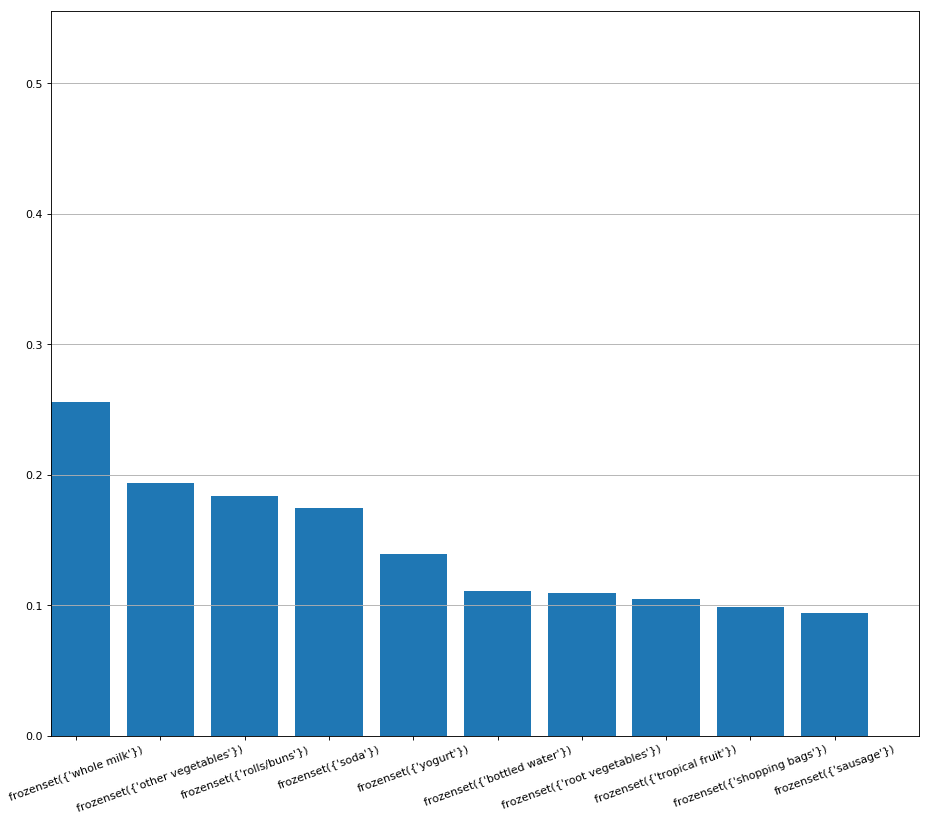

In [18]:
#plt.barh(item_sets_with_support.keys, item_sets_with_support.values)

figure(num=None, figsize=(14, 12), dpi=80, facecolor='w', edgecolor='k')
nSites = sorted(item_sets_with_support.values(), reverse = True)[:10] 
print(nSites)
#top5 = array
lands = sorted(item_sets_with_support.keys(), key=item_sets_with_support.__getitem__, reverse=True)[:10]
print(lands)
landAsX = range (10) 
plt.bar (landAsX, nSites)    # format data as bar chart

# set lands names as labels on X axis (param. rotation is optional)
plt.xticks(landAsX, lands, rotation=20)  

# add some space between bars and axes 
plt.xlim([min(landAsX) - 0.3, max(landAsX) + 1])
plt.ylim([0, max(nSites) + 0.3])                 

plt.grid(True, axis='y')
plt.show()
